# Decision Tree

### Function for outputting rules json

In [1]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        percent_chance = count_labels[1][0]/(count_labels[1][0]+count_labels[0][0])*100
        n = int(count_labels[0][0] + count_labels[1][0])
        node['name'] = '{}% chance of leaving, n = {}'.format(round(percent_chance,2), n)
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, round(threshold, 2))
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node

# Import libraries

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load data

In [3]:
# Load data in to np arrays
hrnames = np.genfromtxt('HR_data.csv', delimiter=",", skip_header = 0, dtype = str)[0]
hrdata = np.genfromtxt('HR_data.csv', delimiter=",", skip_header = 1, dtype = float)

# Delete NaN columns
hrnames = np.delete(hrnames, [7,9], axis=0)
hrnames = hrnames.tolist()
hrdata = np.delete(hrdata, [7,9], axis=1)

# Split out feature and target (input/output)
hrnames_feature = hrnames[0:-1]
hrnames_target = hrnames[-1]
hrdata_feature = hrdata[:,:-1]
hrdata_target = hrdata[:,-1]

# Build and fit decision tree

In [9]:
# Fit decision tree on data
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(hrdata_feature, hrdata_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [10]:
import json

# Generate fitted rules json
r = rules(clf, hrnames_feature, hrnames_target)
with open('hrrules_over.json', 'w') as f:
    f.write(json.dumps(r))

# Clustering

In [8]:
import pandas as pd
%matplotlib inline 

df = pd.read_csv('HR_data.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,sales,salary,salary_bracket,left
0,0.92,0.87,4,226,6,1,0,technical,77000,medium,1
1,0.92,0.87,4,226,6,1,0,technical,71000,medium,1
2,0.92,0.87,4,226,6,1,0,technical,68000,medium,1
3,0.92,0.82,5,265,5,0,0,RandD,72000,medium,1
4,0.91,0.97,5,233,5,0,0,hr,65000,medium,1


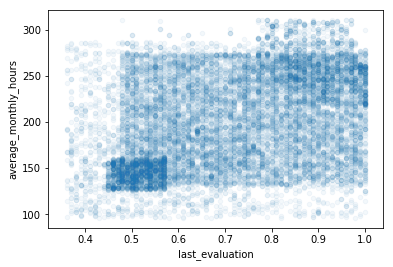

In [23]:
df.plot(kind='scatter', x='last_evaluation', y='average_monthly_hours', alpha=0.05)

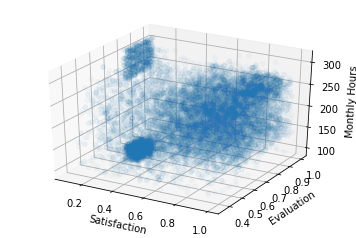

In [28]:


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df.satisfaction_level, df.last_evaluation, df.average_monthly_hours, alpha = 0.03)
threedee.set_xlabel('Satisfaction')
threedee.set_ylabel('Evaluation')
threedee.set_zlabel('Monthly Hours')

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hrdata)

In [36]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

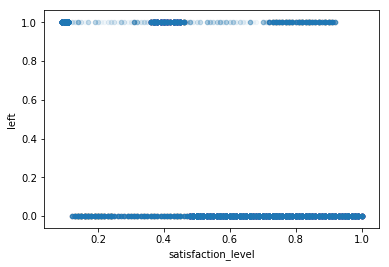

In [32]:
df.plot(kind='scatter', x='satisfaction_level', y='left', alpha=0.05)

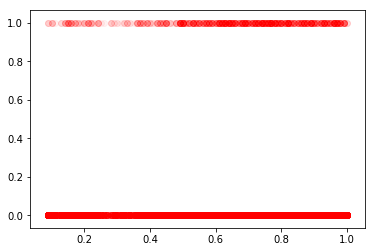

In [34]:
plt.scatter(x = df.satisfaction_level, y = kmeans.labels_, alpha=0.05, color = 'red')